In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score, ConfusionMatrixDisplay

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('feature_extracted_URLs.csv')
df

,url,label,url_length,hostname_length,path_length,fd_length,query_length,count_dir,spcl_char_count,http_count,https_count,www_count,digits_count,path_entropy,true_subdomain_count
0,https://www.google.com,0,22,14,0,0,0,0,2,1,1,1,0,-0.086777,1
1,https://www.youtube.com,0,23,15,0,0,0,0,2,1,1,1,0,-0.081285,1
2,https://www.facebook.com,0,24,16,0,0,0,0,2,1,1,1,0,-0.076389,1
3,https://www.baidu.com,0,21,13,0,0,0,0,2,1,1,1,0,-0.074830,1
4,https://www.wikipedia.org,0,25,17,0,0,0,0,2,1,1,1,0,-0.081600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712409,https://lastpass.com/signup2.php?ac=1&from_uri...,0,1517,12,12,11,1484,1,91,1,1,0,1054,-0.217857,0
712410,https://lastpass.com/signup2.php?ac=1&from_uri...,0,1696,12,12,11,1663,1,97,1,1,0,1204,-0.228372,0
712411,https://asana.com/guide/videos/%22//fast.wisti...,0,2081,9,58,5,2005,8,243,1,1,0,354,-0.044029,0
712412,http://memil.kr/bbs/data/ebay.comm/sq1/sq/inde...,1,53,8,36,3,1,6,4,1,0,0,1,-0.060876,0


In [4]:
df=df.drop(columns='url')
df

,label,url_length,hostname_length,path_length,fd_length,query_length,count_dir,spcl_char_count,http_count,https_count,www_count,digits_count,path_entropy,true_subdomain_count
0,0,22,14,0,0,0,0,2,1,1,1,0,-0.086777,1
1,0,23,15,0,0,0,0,2,1,1,1,0,-0.081285,1
2,0,24,16,0,0,0,0,2,1,1,1,0,-0.076389,1
3,0,21,13,0,0,0,0,2,1,1,1,0,-0.074830,1
4,0,25,17,0,0,0,0,2,1,1,1,0,-0.081600,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
712409,0,1517,12,12,11,1484,1,91,1,1,0,1054,-0.217857,0
712410,0,1696,12,12,11,1663,1,97,1,1,0,1204,-0.228372,0
712411,0,2081,9,58,5,2005,8,243,1,1,0,354,-0.044029,0
712412,1,53,8,36,3,1,6,4,1,0,0,1,-0.060876,0


In [5]:
x=df.drop(columns=['label'])
y=df['label']

In [6]:
#scaling
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
def get_scores(model):
    
    # instantiate model
    model = model()
    
    # fit to data
    model.fit(x_train, y_train)
    
    # make predictions
    preds = model.predict(x_test)

    # print results
    print(f'{model} Training Score: {model.score(x_train, y_train)}')
    print(f'{model} Testing Score: {model.score(x_test, y_test)}')
    print(classification_report(y_test, preds))
    # print(confusion_matrix(y_test, preds))
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
    disp.plot(cmap = 'Reds', values_format='')


# model = RandomForestClassifier()
# model.fit(x_train, y_train)
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# y_pred = model.predict(x_test)
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


LogisticRegression() Training Score: 0.9115068315287289
LogisticRegression() Testing Score: 0.9113157359123545
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     76308
           1       0.89      0.92      0.91     66175

    accuracy                           0.91    142483
   macro avg       0.91      0.91      0.91    142483
weighted avg       0.91      0.91      0.91    142483



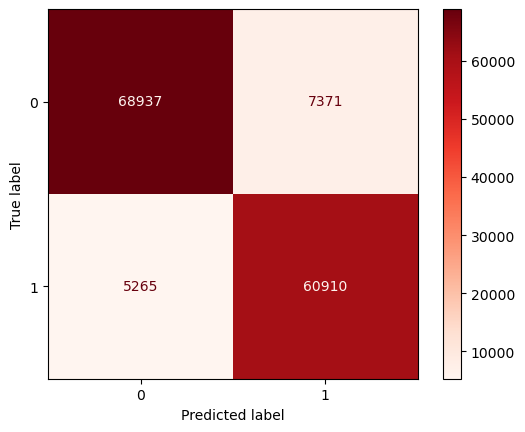

In [10]:
get_scores(LogisticRegression)

SGDClassifier() Training Score: 0.8905376264846095
SGDClassifier() Testing Score: 0.889278019132107
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     76308
           1       0.88      0.88      0.88     66175

    accuracy                           0.89    142483
   macro avg       0.89      0.89      0.89    142483
weighted avg       0.89      0.89      0.89    142483



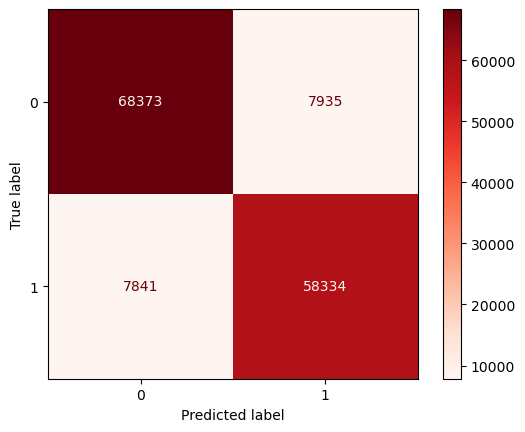

In [11]:
get_scores(SGDClassifier)

KNeighborsClassifier() Training Score: 0.9595056243650547
KNeighborsClassifier() Testing Score: 0.9421474842612803
              precision    recall  f1-score   support

           0       0.94      0.95      0.95     76308
           1       0.95      0.93      0.94     66175

    accuracy                           0.94    142483
   macro avg       0.94      0.94      0.94    142483
weighted avg       0.94      0.94      0.94    142483



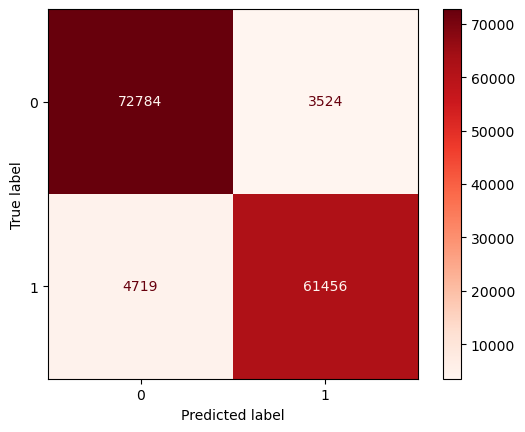

In [12]:
get_scores(KNeighborsClassifier)

GaussianNB() Training Score: 0.8358415316941875
GaussianNB() Testing Score: 0.8344363889025357
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     76308
           1       0.87      0.76      0.81     66175

    accuracy                           0.83    142483
   macro avg       0.84      0.83      0.83    142483
weighted avg       0.84      0.83      0.83    142483



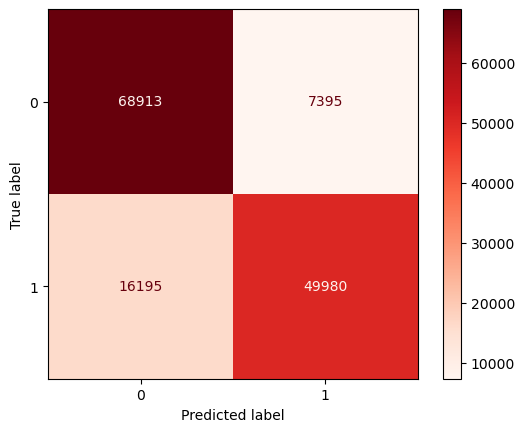

In [ ]:
get_scores(GaussianNB)

DecisionTreeClassifier() Training Score: 0.998055905013063
DecisionTreeClassifier() Testing Score: 0.9646624509590618
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     76308
           1       0.96      0.96      0.96     66175

    accuracy                           0.96    142483
   macro avg       0.96      0.96      0.96    142483
weighted avg       0.96      0.96      0.96    142483



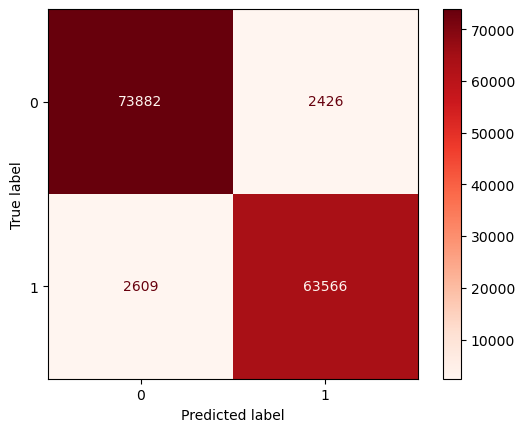

In [16]:
get_scores(DecisionTreeClassifier)

RandomForestClassifier() Training Score: 0.998050641217972
RandomForestClassifier() Testing Score: 0.9762568166026824
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     76308
           1       0.97      0.98      0.97     66175

    accuracy                           0.98    142483
   macro avg       0.98      0.98      0.98    142483
weighted avg       0.98      0.98      0.98    142483



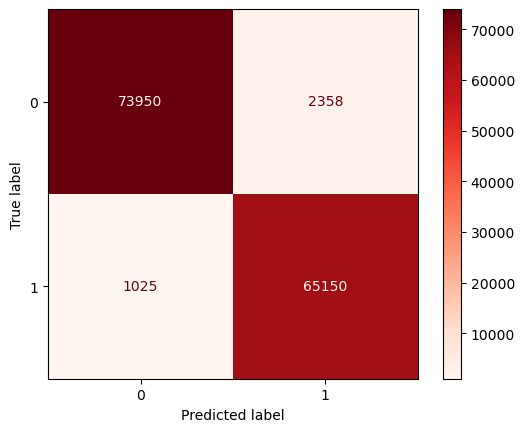

In [9]:
#random forest
get_scores(RandomForestClassifier)

AdaBoostClassifier() Training Score: 0.901972344020592
AdaBoostClassifier() Testing Score: 0.9017145905125524
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     76308
           1       0.88      0.91      0.90     66175

    accuracy                           0.90    142483
   macro avg       0.90      0.90      0.90    142483
weighted avg       0.90      0.90      0.90    142483



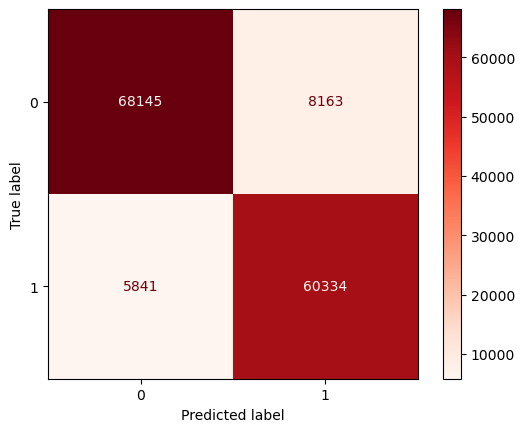

In [18]:
#ada boost
get_scores(AdaBoostClassifier)

GradientBoostingClassifier() Training Score: 0.955154220423174
GradientBoostingClassifier() Testing Score: 0.9546823129776886
              precision    recall  f1-score   support

           0       0.98      0.93      0.96     76308
           1       0.93      0.98      0.95     66175

    accuracy                           0.95    142483
   macro avg       0.95      0.96      0.95    142483
weighted avg       0.96      0.95      0.95    142483



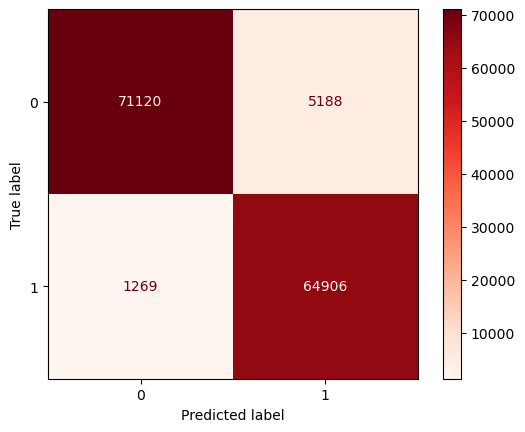

In [19]:
#gradient boosting
get_scores(GradientBoostingClassifier)

ExtraTreesClassifier() Training Score: 0.998055905013063
ExtraTreesClassifier() Testing Score: 0.9758848424022515
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     76308
           1       0.97      0.98      0.97     66175

    accuracy                           0.98    142483
   macro avg       0.98      0.98      0.98    142483
weighted avg       0.98      0.98      0.98    142483



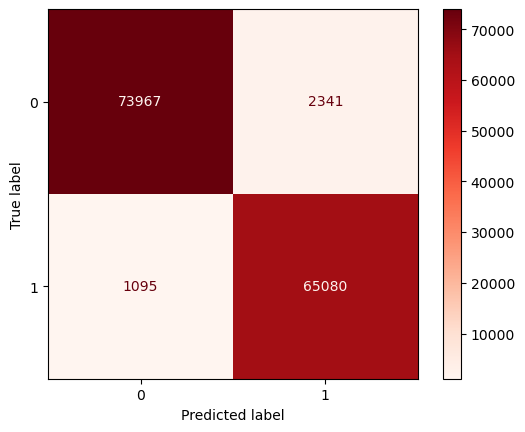

In [20]:
#extra trees
get_scores(ExtraTreesClassifier)

BaggingClassifier() Training Score: 0.9965294044366774
BaggingClassifier() Testing Score: 0.9731406553764309
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     76308
           1       0.97      0.97      0.97     66175

    accuracy                           0.97    142483
   macro avg       0.97      0.97      0.97    142483
weighted avg       0.97      0.97      0.97    142483



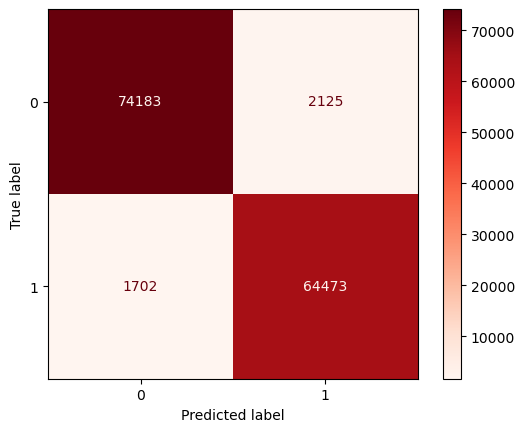

In [21]:
#bagging
get_scores(BaggingClassifier)

In [ ]:
#svc
get_scores(SVC)

In [ ]:
#hyperparameter tuning

# Define hyperparameter space
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_distributions,
    n_iter=5,  # Try 5 random combinations
    cv=5,
    random_state=42,
    verbose=2,
    scoring='accuracy'
)

# Fit search on training data
random_search.fit(x_train, y_train)

# Output best parameters
print("Best Parameters:", random_search.best_params_)

# Retrain the best model
best_model = RandomForestClassifier(**random_search.best_params_)
best_model.fit(x_train, y_train)

# Evaluate on test data
y_pred_best = best_model.predict(x_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.6min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.2min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time= 2.0min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.6min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.7min
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time= 1.1min
[CV] END max_depth=None

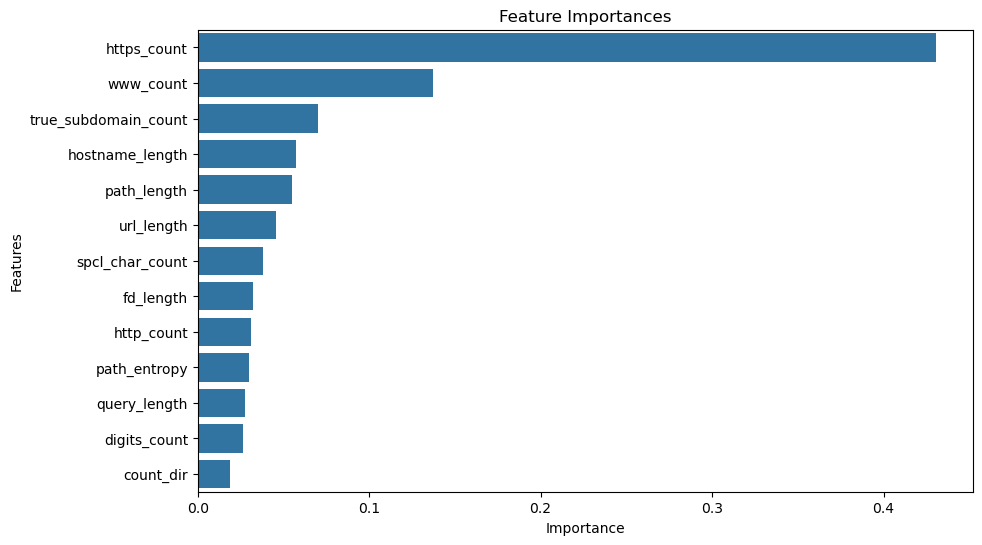

In [12]:
#feature importance
import matplotlib.pyplot as plt
import seaborn as sns
importances = best_model.feature_importances_
feature_names = x.columns
indices = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names[indices])
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [ ]:
#now i want to use only top 10 features and make a new model
top_features = feature_names[indices][:10]
x_top = x[top_features]
# x_top_scaled = scaler.fit_transform(x_top)
x_train_top, x_test_top, y_train_top, y_test_top = train_test_split(x_top, y, test_size=0.2, random_state=42)

# Train a new model with top 10 features
model_top = RandomForestClassifier(**random_search.best_params_)
model_top.fit(x_train_top, y_train_top)
# Evaluate the new model
y_pred_top = model_top.predict(x_test_top)
print("Top 10 Features Model Accuracy:", accuracy_score(y_test_top, y_pred_top))

# # Feature importance for the top 10 features model
# importances_top = model_top.feature_importances_
# plt.figure(figsize=(10, 6))
# sns.barplot(x=importances_top, y=top_features)
# plt.title('Top 10 Feature Importances')
# plt.xlabel('Importance')
# plt.ylabel('Features')
# plt.show()


Top 10 Features Model Accuracy: 0.9710983064646309


In [17]:
#save model
import joblib
joblib.dump(model_top, 'phishing_model.pkl')
# joblib.dump(scaler, 'scaler.pkl')
# Load the model
loaded_model = joblib.load('phishing_model.pkl')
# loaded_scaler = joblib.load('scaler.pkl')

# Make predictions with the loaded model